In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [3]:
df = pd.read_csv('dataset.csv')

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

vehicle_type_weights = {
    'car': 1.0,
    'truck': 1.5,
    'bike': 0.5,
    'bus': 2.0,
    'cycle': 0.7
}

df['VehicleTypeWeight'] = df['VehicleType'].map(vehicle_type_weights).fillna(0)

df['occupancy_ratio'] = df['Occupancy'] / df['Capacity']

alpha = 10.0
k = 2.0
beta = 1.5
gamma = 3.0
delta = 4.0
epsilon = 2.0

traffic_mapping = {'low': 1, 'average': 2, 'high': 3}
df['Traffic_Numerical'] = df['TrafficConditionNearby'].map(traffic_mapping).fillna(1)

df['raw_demand'] = (
    alpha * np.tanh(k * df['occupancy_ratio']) +
    beta * np.log1p(df['QueueLength']) -
    gamma * (df['Traffic_Numerical'] / 10) ** 2 +
    delta * df['IsSpecialDay'] +
    epsilon * df['VehicleTypeWeight']
)

scaler = MinMaxScaler()
df['normalized_demand'] = scaler.fit_transform(df[['raw_demand']])

BasePrice = 10.0
lambda_factor = 1.2

df['price'] = BasePrice * (0.6 + lambda_factor * df['normalized_demand'])

df['price'] = df['price'].clip(lower=BasePrice * 0.5, upper=BasePrice * 2.0)

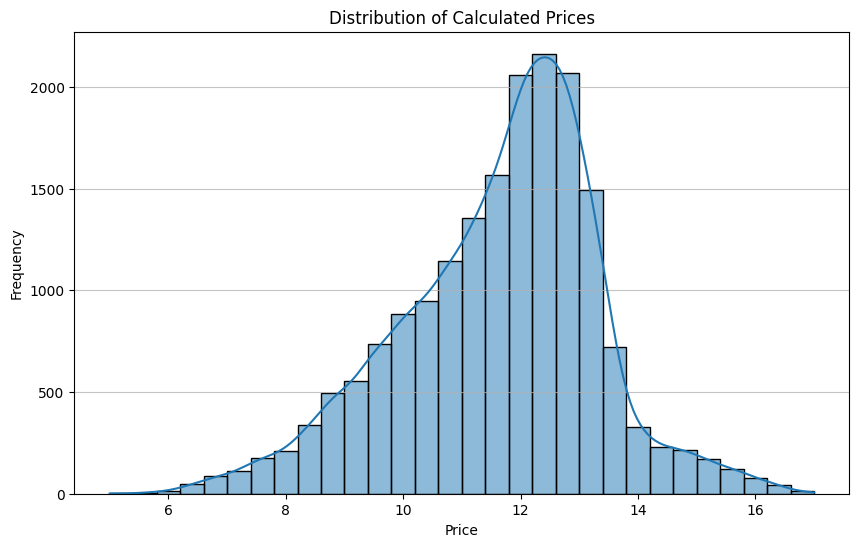

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Calculated Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [33]:
min_price = df['price'].min()
max_price = df['price'].max()

print(f"The range of the calculated prices is from {min_price:.2f} to {max_price:.2f}.")

The range of the calculated prices is from 6.00 to 18.00.
